# Retrieving Road Network Data
Data about the road network, such as the locations of intersections, the length, lanes, speed limit and geometry of a road link, is an integral part in traffic simulation. Thinking of traffic modeling as getting outcomes (e.g., traffic flow) under given road supply and travel demand, the road network then defines the supply of the system.

In today's exercise, we will learn how to download raw road network data from OpenStreetMap (OSM). We will show three different ways to accomplish this task and you can select the most convenient method depending on the scale of your problem.
- Small and interactive: Overpass-turbo (graphical)
- Large datasets: Overpass API (shell commands)
- Cleaned data, good for network analysis: OSMnx (Python)

## Overpass-turbo
Overpass-turbo is a handy way to download data for a small area. You can access overpass-turbo at https://overpass-turbo.eu/. Select an area of interest (e.g., UC Berkeley campus) and type your queries on the left.
<img src="overpass-turbo-1-note.png" alt="drawing" width="400"/>

Next, click "Run" and see the query results under the "Data" tab. You can copy and paste the result to a text editor for future use.

<table><tr>
<td> <img src="overpass-turbo-2.png" alt="Drawing" width="200"/>  </td>
<td> <img src="overpass-turbo-3.png" alt="Drawing" width="200"/> </td>
</tr></table>

## Overpass API
If you want to download the road network data for a relatively large area (e.g., a city), it is better to use the Overpass API from a command line terminal. For example, below is the text to download all roads classified as `residential` and above for Berkeley.

```
data=[out:json]; 
way[highway~'motorway|motorway_link|motorway_junction|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|residential']
(poly:'37.84615220228875 -122.4537615259554 37.9205424163833 -122.42627473534108 37.97662600406699 -122.27439451079097 37.93944332562459 -122.18153759427354 37.85457143622269 -122.14440323003141 37.78981170543388 -122.19181902134872 37.764909622499076 -122.34990028037001 37.78612226780035 -122.42013291803424 37.84615220228875 -122.4537615259554');
(._;>;);
out;
```

Save the above to a file called `query.osm` and upload it to your Google colab file directory. Then run the following command in the Google colab.
```
!wget -O target.osm --post-file=query.osm "https://overpass-api.de/api/interpreter"
```

<img src="overpass-api.png" alt="drawing" width="800"/>

Reference: [Overpass API Command Line](http://overpass-api.de/command_line.html)

## OSMnx
[OSMnx is a Python package to retrieve, model, analyze, and visualize street networks from OpenStreetMap](https://geoffboeing.com/2016/11/osmnx-python-street-networks/). It was developed by [Geoff Boeing](https://geoffboeing.com/) while he was a PhD student at UC Berkeley. The [original blog post](https://geoffboeing.com/2016/11/osmnx-python-street-networks/) and [code repo](https://github.com/gboeing/osmnx) provide sufficient information to get start. Here we will show a small example.

In [1]:
import osmnx as ox

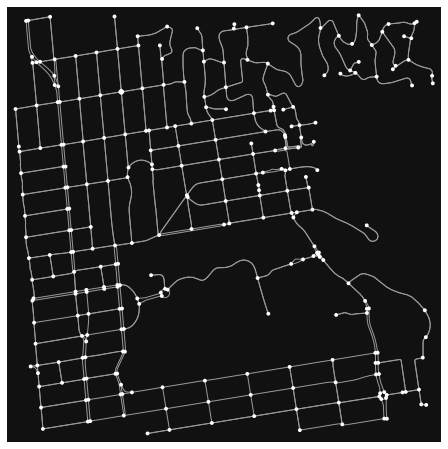

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
# get road network by address
G = ox.graph_from_address('1878 Euclid Avenue, Berkeley, California', network_type='drive')

# plot the road network
ox.plot_graph(G)

In [6]:
# convert the graph into nodes and edges file
nodes_gdf, edges_gdf = ox.utils_graph.graph_to_gdfs(G)
display(nodes_gdf.head(2))
display(edges_gdf.head(2))

,y,x,osmid,highway,geometry
35719102,37.867389,-122.249579,35719102,NaN,POINT (-122.24958 37.86739)
35719103,37.867412,-122.249841,35719103,NaN,POINT (-122.24984 37.86741)


,osmid,name,highway,maxspeed,oneway,length,geometry,lanes,bridge,junction,u,v,key
0,435440767,Hillside Avenue,residential,25 mph,False,23.204,"LINESTRING (-122.24958 37.86739, -122.24974 37...",NaN,NaN,NaN,35719102,35719103,0
1,311941950,Prospect Street,tertiary,25 mph,False,70.607,"LINESTRING (-122.24984 37.86741, -122.24995 37...",NaN,NaN,NaN,35719103,53055000,0
